In [1]:
import numpy as np
from numba import jit
from pylidar import lidarprocessor
from pylidar.toolbox import spatial
from pylidar.lidarformats import pulsewaves
from pylidar.lidarformats import generic
from pylidar import userclasses as uc
from matplotlib import pyplot as plt


In [2]:
inFile = r"C:\Projects\RD\NEON_data\NIWO\waveform\NEON_D13_NIWO_DP1_L001-1_2017090415_translate.plz"
# inFile = r"C:\Projects\RD\NEON_data\NIWO\waveform\NEON_D13_NIWO_DP1_L001-1_2017090415_translate.wvz" #results in error

print (pulsewaves.isPulseWavesFile(inFile))
pw_info = pulsewaves.PulseWavesFileInfo(inFile)
print(pw_info.getDriverName())

print(generic.READ)

dataFiles = lidarprocessor.DataFiles()
dataFiles.input1 = lidarprocessor.LidarFile(inFile, lidarprocessor.READ)

#with pulsewaves.PulseWavesFile(inFile, generic.READ, 'test','test' ) as pw:
#    header = pw.getHeader()
#    tot_pulses = pw.getTotalNumberPulses()
    


True
PulseWaves
0


In [3]:
print(dataFiles.input1)

In [4]:
BINSIZE=0.5
header = pw_info.header
xMin, yMax, ncols, nrows = spatial.getGridInfoFromHeader(header, BINSIZE)
print(xMin, yMax, ncols, nrows)

(441236.94, 4434680.77, 19791, 3320)


In [5]:
def readFunc(data, otherArgs):
    # returns 2d masked structured array with info about waveforms
    # first axis is waveform number, second is pulse
    #waveinfo = data.input1.getWaveformInfo()
    otherArgs.waveinfo = data.input1.getWaveformInfo()
    
    # returns masked 3d radiance array
    # first axis is waveform bin, second is waveform number, third is pulse
    #recv = data.input1.getReceived()
    #trans = data.input1.getTransmitted()
    otherArgs.recv = data.input1.getReceived()
    otherArgs.trans = data.input1.getTransmitted()
    
    #print('waveinfo\n {}'.format(otherArgs.waveinfo))
    #print('\nrecv\n {}'.format(otherArgs.recv))
    #print('\ntrans\n {}'.format(otherArgs.trans))
    
    #return waveinfo
    #return waveinfo, recv, trans



In [6]:
inFile = r"C:\Projects\RD\NEON_data\NIWO\waveform\NEON_D13_NIWO_DP1_L001-1_2017090415_translate_1.pls"
dataFiles = lidarprocessor.DataFiles()
dataFiles.input1 = lidarprocessor.LidarFile(inFile, lidarprocessor.READ)

otherArgs = lidarprocessor.OtherArgs()
otherArgs.waveinfo = 0
otherArgs.recv = 1
otherArgs.trans = 2
lidarprocessor.doProcessing(readFunc, dataFiles, otherArgs=otherArgs)
#lidarprocessor.doProcessing(readFunc, dataFiles)

In [66]:
print(otherArgs.waveinfo.shape)
print(otherArgs.waveinfo.dtype)
print(otherArgs.waveinfo['RANGE_TO_WAVEFORM_START'])
print(otherArgs.waveinfo['RECEIVE_WAVE_GAIN'].max())

(2L, 38764L)
[('NUMBER_OF_WAVEFORM_RECEIVED_BINS', '<u4'), ('RECEIVED_START_IDX', '<u8'), ('NUMBER_OF_WAVEFORM_TRANSMITTED_BINS', '<u4'), ('TRANSMITTED_START_IDX', '<u8'), ('RANGE_TO_WAVEFORM_START', '<f8'), ('CHANNEL', 'u1'), ('RECEIVE_WAVE_GAIN', '<f4'), ('RECEIVE_WAVE_OFFSET', '<f4'), ('TRANS_WAVE_GAIN', '<f4'), ('TRANS_WAVE_OFFSET', '<f4')]
[[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [6997.0 7005.0 7013.0 ..., 6789.0 6789.0 6789.0]]
1.0


In [40]:
print(otherArgs.recv.shape)
print(otherArgs.recv.dtype)

ex=[]
for i in range(38764):

    # get the relative maxima locations
    x = otherArgs.recv[:,1,i]
    amax = (x[1:-1] > x[:-2]) & (x[1:-1] > x[2:])
    locs = np.arange(1, x.size-1)[amax]
    
    # this grabs the index if there are more than 10 relative maxima..
    # data is noisy though
    if locs.size > 10:
        ex.append(i)
    
print ex   
#plt.plot(otherArgs.recv[:,1,ex])
#plt.show()
#print(otherArgs.recv)



(96L, 2L, 38764L)
int32
[1665, 2626, 2686, 6539, 6745, 6776, 8010, 15386, 21963, 29741, 29856, 29858, 29862, 29865, 35808]


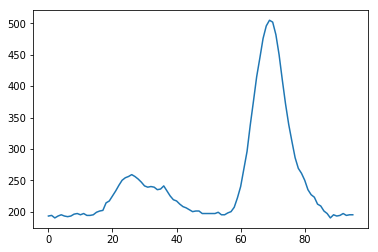

In [60]:
plt.plot(otherArgs.recv[:,1,ex[9]])
plt.show()

#9,10, 11,


(48L, 2L, 38764L)
int32


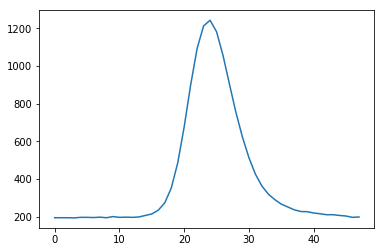

[[[197 197 195 ..., 198 195 195]
  [-- -- -- ..., -- -- --]]

 [[201 195 193 ..., 195 197 193]
  [-- -- -- ..., -- -- --]]

 [[197 197 193 ..., 197 194 197]
  [-- -- -- ..., -- -- --]]

 ..., 
 [[212 215 223 ..., 214 220 --]
  [-- -- -- ..., -- -- --]]

 [[203 211 221 ..., 212 219 --]
  [-- -- -- ..., -- -- --]]

 [[204 206 215 ..., 208 211 --]
  [-- -- -- ..., -- -- --]]]


In [61]:
print(otherArgs.trans.shape)
print(otherArgs.trans.dtype)
plt.plot(otherArgs.trans[:,0,ex[9]])
plt.show()


In [67]:
print(header)

{'SYSTEM_IDENTIFIER': 'ALTM GEMINI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'PULSE_ATTRIBUTES': 0L, 'FILE_CREATION_DAY': 278L, 'HEADER_SIZE': 352L, 'PROJECT_ID_GUID_DATA_1': 1100783457L, 'PROJECT_ID_GUID_DATA_3': 18685L, 'PROJECT_ID_GUID_DATA_2': 40020L, 'FILE_SOURCE_ID': 111L, 'NUMBER_OF_VARIABLE_LENGTH_RECORDS': 6L, 'X_MAX': 451132.67, 'FILE_CREATION_YEAR': 2017L, 'GENERATING_SOFTWARE': 'OptechLMS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 'GLOBAL_PARAMETERS': 0L, 'Y_MAX': 4434680.77, 'Z_MAX': 4091.15, 'OFFSET_TO_PULSE_DATA': 2880L, 'Y_MIN': 4433020.94, 'Z_MIN': 2938.98, 'PULSE_SIZE': 48L, 'NUMBER_OF_APPENDED_VARIABLE_LENGTH_RECORDS': 0L,

In [69]:
# save the samples
import pickle
#p_winfo = r'C:\Projects\RD\NEON_data\NIWO\waveform\pickles\p_winfo.pickle'
#p_trans = r'C:\Projects\RD\NEON_data\NIWO\waveform\pickles\p_trans.pickle'
#p_recv = r'C:\Projects\RD\NEON_data\NIWO\waveform\pickles\p_recv.pickle'
p_otherArgs = r'C:\Projects\RD\NEON_data\NIWO\waveform\pickles\otherArgs.pickle'

with open(p_otherArgs, 'wb') as f:
    pickle.dump(otherArgs, f)